<class 'pandas.core.series.Series'>


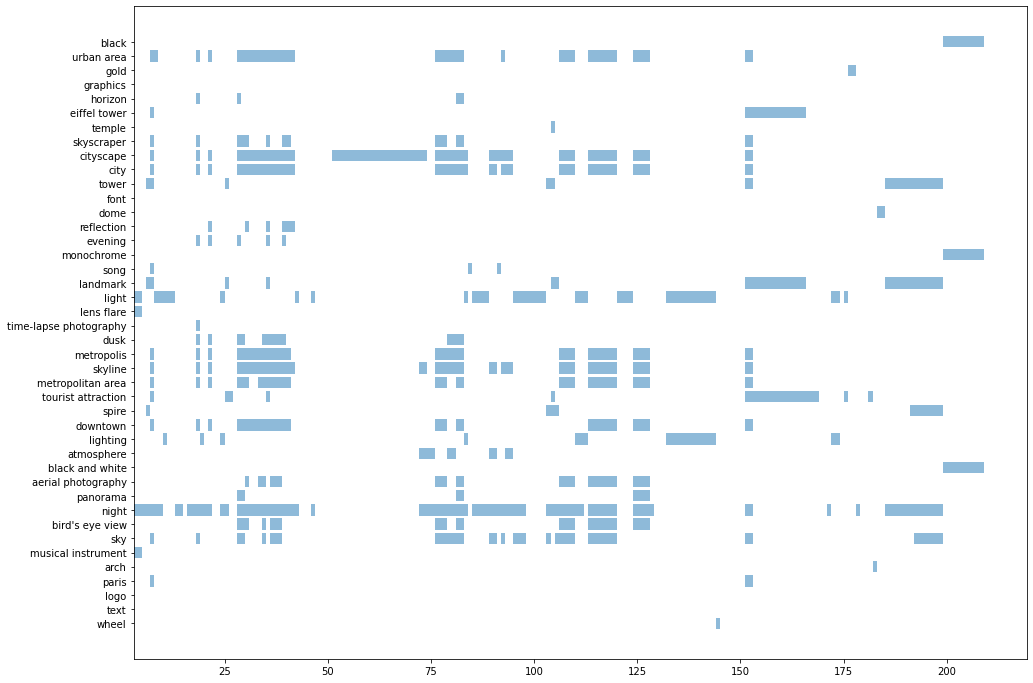

,confidence,segment.start_time_offset.seconds,segment.start_time_offset.nanos,segment.end_time_offset.seconds,segment.end_time_offset.nanos,entity.description,object,start,end,time_start_to_end
0,0.403711,144.0,458333000.0,145,541666000.0,wheel,wheel,144.0,145,1.0
1,0.425210,NaN,NaN,2,NaN,text,text,NaN,2,NaN
2,0.359793,NaN,NaN,2,NaN,logo,logo,NaN,2,NaN
3,0.959661,7.0,708333000.0,8,791666000.0,paris,paris,7.0,8,1.0
4,0.915823,151.0,666666000.0,153,541666000.0,paris,paris,151.0,153,2.0
5,0.637024,182.0,833333000.0,183,291666000.0,arch,arch,182.0,183,1.0
6,0.392725,3.0,NaN,5,83333000.0,musical instrument,musical instrument,3.0,5,2.0
7,0.333074,7.0,708333000.0,8,791666000.0,sky,sky,7.0,8,1.0
8,0.854663,18.0,416666000.0,19,208333000.0,sky,sky,18.0,19,1.0
9,0.777454,28.0,541666000.0,29,625000000.0,sky,sky,28.0,29,1.0


In [2]:
import pandas as pd
import json
from matplotlib import pyplot as plt


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)

pd.set_option("display.max_rows", None, "display.max_columns", None)

fileName = 'Tower1'

f = open(f'../video/output/{fileName}.json')

with open(f'../video/output/{fileName}.json') as data_file:    
    data = json.load(data_file)  

# Getting shot_label_annotations array:

h = data['annotation_results'][0]['shot_label_annotations']#[1]['segments']

segments = pd.json_normalize(h, record_path=['segments'], meta=[['entity','description']], errors='ignore')

entities = pd.json_normalize(h) 

# print(segments)

# print(entities)

df = pd.DataFrame(segments)

df['object'] = (df.iloc[:, 5])

# number of days from project start to task start
df['start'] = (df.iloc[:, 1])

# number of days from project start to end of tasks
df['end'] = (df.iloc[:, 3])

# days between start and end of each task
df['time_start_to_end'] = df.end - df.start

df['confidence'] = df['confidence'].astype(float)

alpha = df.confidence

print(type(alpha))

fig, ax = plt.subplots(1, figsize=(16,12))
ax.barh(df.object, df.time_start_to_end, left=df.start, alpha = 0.5 )
plt.show()


df.to_pickle(f'../video/output/{fileName}.pickle')

df

#x = h['entity']['description']





